# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Business Context



The Internet has revolutionized the way we access news, making it readily available at our fingertips anytime, anywhere. With just a few clicks or taps, we can instantly access a wealth of information from a multitude of sources. Traditional newspapers have been augmented with, or even replaced by, electronic news in the form of web pages. These complex systems include multimedia and links, adding a new dimension to news consumption.

One online news portal, E-news Express, offers subscriptions to users. However, subscriptions have been on the decline, and the executive team believes that this is due to a poorly designed landing page and content recommendation algorithms. They believe that the longer a user remains on the landing page, the more likely that user is to purchase a subsciption. As a result, they want the Data Science team to perform some research to investigate this opinion.

**Key Takeways**
1. Monthly subscriptions have declined over the past year.
2. Executives believe this is because the current web page is poorly designed.
3. Executives also believe the longer users are on a page, the more likely they are to subscribe.



## Objective

Management wants to know if launching an enhanced landing page will increase user engagement and subscription conversion rates. To test this, they plan to conduct A/B testing with the current page, as well as a new page with a better outline and improved content recommendations.

 To prove or disprove that the new landing page will lead to more subscribers, the Data Science team created an experiment. They randomly selected 100 users and divided them into two groups and gathered data as those users interacted with the landing page.

 *   Control group that will see the existing landing page
 *   Treatment group that will see the new landing page

A significance level of 5% was chosen for this experiment.

**Questions to Answer**

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

*   **user_id**. Unique user ID of the person visiting the website
*   **group**. Whether the user belongs to the first group (control) or the second group (treatment)
*   **landing_page**. Whether the landing page is new or old
*   **time_spent_on_the_page**. Time (in minutes) spent by the user on the landing page
*   **converted**. Whether the user gets converted to a subscriber of the news portal or not
*   **language_preferred**. Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# Note: The provided version of pandas is generating an error: "google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible."
# To resolve this, pandas version is updated below to be 2.0.3.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Load the libraries we need

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

# Function for handling normal distribution and statistical calculation
from scipy.stats import norm

In [ ]:
# Load Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [ ]:
# Define path to data file
path = r'/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/2-Intro to Statistics/Project 2/'
df = pd.read_csv(path + 'abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

In this section, we will explore the dataset and perform some analysis so we can prepare to answer the questions posed by the experiment.

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates
- Check unique values

In [ ]:
# Preview the data (first and last 5 rows)
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [ ]:
# Inspect the dataframe
print(df.shape)
print('The dataset has',df.shape[0], 'rows and', df.shape[1], 'columns')

(100, 6)
The dataset has 100 rows and 6 columns


In [ ]:
# Preview the data characteristics for numerical columns
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
# Preview the unique categorical values
df.nunique()

user_id                   100
group                       2
landing_page                2
time_spent_on_the_page     94
converted                   2
language_preferred          3
dtype: int64

In [ ]:
# Preview the types
data_types = df.dtypes
data_types

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

In [ ]:
# Check counts, unique counts and duplicate values for each column. Based on this, we can decide how to approach each variable.
for col in df:
  duplicate_count = df[col].count()-df[col].nunique()
  print('Series', col, 'has', df[col].nunique(),'unique values and', duplicate_count, 'duplicates.')

Series user_id has 100 unique values and 0 duplicates.
Series group has 2 unique values and 98 duplicates.
Series landing_page has 2 unique values and 98 duplicates.
Series time_spent_on_the_page has 94 unique values and 6 duplicates.
Series converted has 2 unique values and 98 duplicates.
Series language_preferred has 3 unique values and 97 duplicates.


In [ ]:
# Display the unique values for a few series
print('Possible groups:',df['group'].unique())
print('Possible converted:',df['converted'].unique())
print('Possible landing pages:',df['landing_page'].unique())
print('Possible language preferred:',df['language_preferred'].unique())

Possible groups: ['control' 'treatment']
Possible converted: ['no' 'yes']
Possible landing pages: ['old' 'new']
Possible language preferred: ['Spanish' 'English' 'French']


In [ ]:
# Check for any null values
print('group:',df['group'].isnull().sum(),'null values in',df.value_counts('group'),'\n')
print('converted:',df['converted'].isnull().sum(),'null values in',df.value_counts('converted'),'\n')
print('landing_page:',df['landing_page'].isnull().sum(),'null values in',df.value_counts('landing_page'),'\n')
print('language_preferred:',df['language_preferred'].isnull().sum(),'null values in', df.value_counts('language_preferred'),'\n')

group: 0 null values in group
control      50
treatment    50
Name: count, dtype: int64 

converted: 0 null values in converted
yes    54
no     46
Name: count, dtype: int64 

landing_page: 0 null values in landing_page
new    50
old    50
Name: count, dtype: int64 

language_preferred: 0 null values in language_preferred
French     34
Spanish    34
English    32
Name: count, dtype: int64 



**Observations**
* The data has 100 rows and 6 columns
* Each sample population has 50 users
* The data has no null values.
* The data has only two numerical series:
   *   user_id
   *   time_spent_on_the_page

* The data has four categorical series:
   *   group
   *   landing_page
   *   time_spent_on_the_page
   *   converted
   *   language_preferred

* Some statistical observations:
   *  The minimum time spent on a page is 0.19 seconds.
   *  The maximum time spent on a page is 10.71 seconds.
   *  The median time spent on a page is 5.415 seconds.
   *  The mean (average) time spent on a page is 5.3778 seconds (slightly lower than the mean, so a very slightly skewed distribution).


### Univariate Analysis

First, let's convert our yes/no categorical values to numerical ones since this will make them more useful for charting. We will do this by creating two new colums for converted and landing_page.

In [ ]:
# Create additional dataframes for analysis, and map categorical variables to numerical (boolean) ones
df['isConverted'] = df['converted'].map({'yes': 1, 'no': 0})
df['isNewLandingPage'] = df['landing_page'].map({'new': 1, 'old': 0})

We also want to add a column for rounded times, since we have so many individual values that will clutter certain types of charts. We could do this with bins, or by rounding the times. In this case we'll round to the nearest half-second.

In [ ]:
# Create a new column with rounded half seconds
round_to_half_second = lambda x: round(x * 2) / 2
df['time_spent_on_the_page_rounded'] = df['time_spent_on_the_page'].apply(round_to_half_second)
df


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,isConverted,isNewLandingPage,time_spent_on_the_page_rounded
0,546592,control,old,3.48,no,Spanish,0,0,3.5
1,546468,treatment,new,7.13,yes,English,1,1,7.0
2,546462,treatment,new,4.40,no,Spanish,0,1,4.5
3,546567,control,old,3.02,no,French,0,0,3.0
4,546459,treatment,new,4.75,yes,Spanish,1,1,5.0
...,...,...,...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish,0,1,5.0
96,546544,control,old,6.52,yes,English,1,0,6.5
97,546472,treatment,new,7.07,yes,Spanish,1,1,7.0
98,546481,treatment,new,6.20,yes,Spanish,1,1,6.0


In [ ]:
# Check the data again after adding the rounded column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
isConverted,100.0,0.5400,0.500908,0.00,0.00,1.000,1.0000,1.00
isNewLandingPage,100.0,0.5000,0.502519,0.00,0.00,0.500,1.0000,1.00
time_spent_on_the_page_rounded,100.0,5.3700,2.376888,0.00,4.00,5.500,7.0000,10.50


Next, let's plot out our numerical values for a first look. We will also reuse our functions from the last project to avoid rewriting the same code multiple times.

In [ ]:
#The functions below help us avoid repeating a lot of code elsewhere, for commonly used plots

# Function to print a boxplot
def print_boxplot(data, column, width, height, titleText):
  """ Print a single boxplot with title and labels """

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)

  # define plot
  sns.boxplot(data=df,x=column);
  plt.show()

# Function to print a barplot using a pivot table and optional head(N) value
def print_barplot(data, xCol, yCol, width, height, titleText, hue=None, topRowCount=None):
  """ Print a single barplot with title and labels using a pivot table """

  # set figure size and other elements
  plt.figure(figsize=(width, height))
  plt.title(titleText)
  plt.xticks(rotation=90)
  plt.xlabel(xCol)
  plt.ylabel(yCol)

  if hue == None:
    if topRowCount == None:
        sns.barplot(data=data, x=xCol, y=yCol);
    else:
        sns.barplot(data=data.head(topRowCount), x=xCol, y=yCol);
  else:
    if topRowCount == None:
      sns.barplot(data=data, x=xCol, y=yCol, hue=xCol);
    else:
      sns.barplot(data=data.head(topRowCount), x=xCol, y=yCol, hue=xCol);

# Function to print a histogram
def print_histogram(data, column, width, height, titleText, hue=None):
  """ Print a single, sorted histogram with title and labels and optional hue"""

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)
  plt.xticks(rotation=90)

  if hue == None:
    sns.histplot(data=df,x=column, legend=False, kde=True);
  else:
    sns.histplot(data=df,x=column, hue=column, legend=False, kde=True);

#### user_id

We don't need to plot user_id since this is really our measure to use with the other series when analyzing the data. User identifiers will be one of the values we sum up and chart.

#### time_spent_on_the_page

Below, we can see that most users spent between 5 to 6 minutes on the landing page, with half the users on the page for about five and half minutes.

We can see there are outliers as well. Some users spent hardly any time at all on the landing page, while others spent a lot of time.

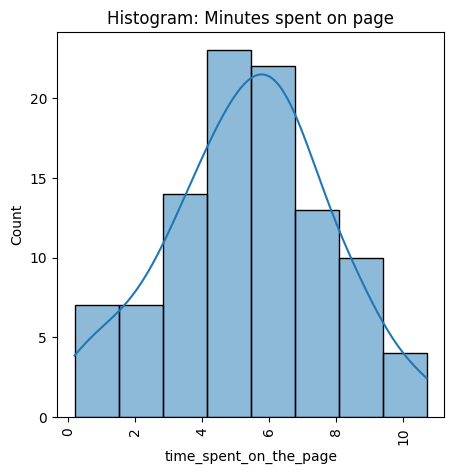

In [ ]:
print_histogram(df, 'time_spent_on_the_page', 5, 5, 'Histogram: Minutes spent on page')

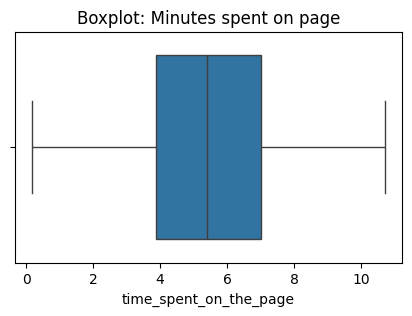

In [ ]:
# Create boxplot for minutes spent on the page
print_boxplot(df, 'time_spent_on_the_page', 5, 3, 'Boxplot: Minutes spent on page')

#### group

 Here, we don't need a boxplot since we already know there are only two categorical values. Instead, we will look at the counts for each in a histogram plot.

 We can see that the counts are equal, and we know that the group of 100 viewers was split into two even groups of 50.

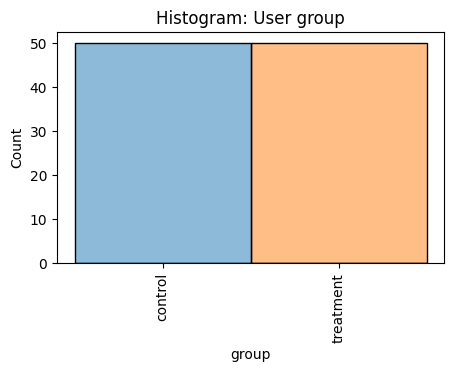

In [ ]:
# Create a histogram for users by group
print_histogram(df, 'group', 5, 3, 'Histogram: User group', hue='group')

#### landing_page

Again, we don't need a boxplot since we already know there are only two **categorical** values. Instead, we will look at the counts for each in a histogram plot.

Landing page and group mean essentially the same thing in this experiment, since the control group received the old landing page and the treatment group received the new landing page. Again, we see the same counts.

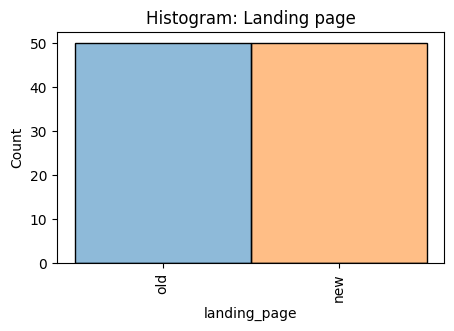

In [ ]:
# Create a histogram for users by landing page
print_histogram(df, 'landing_page', 5, 3, 'Histogram: Landing page', hue='landing_page')

#### converted

Here, we have only two possible values (converted or not), so we don't need a boxplot.

We can see that just a little over half of the users were converted, meaning that they signed up for a subscription.

Since we care about conversions, it could be interesting to predict whether or not a user will be converted on the new landing page. We will do this later.

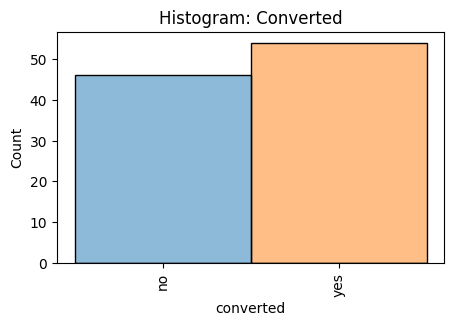

In [ ]:
# Create a histogram to show converted (subscription) vs. non-converted (non-subscription) users
print_histogram(df, 'converted', 5, 3, 'Histogram: Converted', hue='converted')

#### language_preferred

Once again, we are looking at a categorical value, so we can use a histogram.

We can see that the language preferences are fairly uniformly distributed.

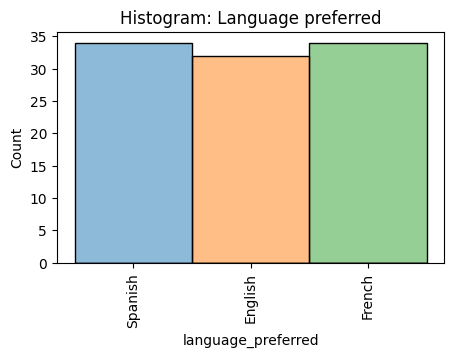

In [ ]:
# Create a histogram to illustrate users by language preference
print_histogram(df, 'language_preferred', 5, 3, 'Histogram: Language preferred', hue='language_preferred')

### Bivariate Analysis

Now that we have insight into the individual series, we want to examine several of them in relationship to other variables. This will be easier since we've added some columns to make our analysis easier.

We want to look at:

*   Conversion result by user group
*   Conversion result by user language preference
*   Minutes spent on page by user group
*   Minutes spent on page by user language preference

Since we know that the control group recieved the old landing page and the treatment group received the new landing page, we can use these values interchangeably. All users in the control group were sent to the old landing page, and all users in the treatment group were sent to the new landing page.

To make comparisions easier, let's group the data by control (old landing page) and treatment (new landing page) groups for use later.



In [ ]:
# Create separate dataframes for the treatment and control groups
df_treatment = df[df['group'] == 'treatment'].sort_values(by='language_preferred', ascending=True)
df_control   = df[df['group'] == 'control'].sort_values(by='language_preferred', ascending=True)


####Conversion Result by User Group

By comparing the control and treatment user groups, we can check the conversion rate independently for each.

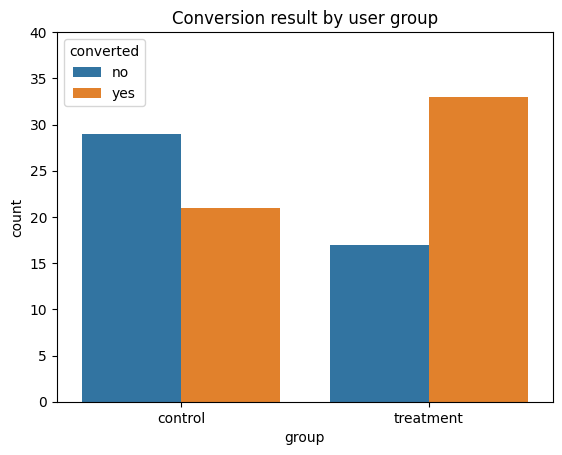

In [ ]:
# Plot users by each group and compare the conversion result
fig = plt.figsize=(8,5)
plt.tight_layout()
plt.ylim(0,40)

ax = sns.countplot(data=df, x='group', hue='converted')

plt.title('Conversion result by user group')
plt.show()

In [ ]:
cross_tab_group_conversion = pd.crosstab(df['group'], df['isConverted'])
cross_tab_group_conversion

isConverted,0,1
group,,
control,29,21
treatment,17,33


**Observations**
*   Users who were in the control group (old landing page) were not converted as often as users in the treatment group (new landing page).
  *  Control group: 21/50 users were converted
  *  Treatment group: 33/50 users were converted
*   The highest count of converted users were in the treatment (new landing page) group.

####Conversion Result by User Language Preference

Now that we know the conversion rate of each group differs, let's identify the differences using some of our other variables.

Language is another series we can use to examine converted and non-converted users in each group.

In [ ]:
# count the users in each language
english_user_count = df[(df['language_preferred'] == 'English')]
french_user_count = df[(df['language_preferred'] == 'French')]
spanish_user_count = df[(df['language_preferred'] == 'Spanish')]
print('# English :', english_user_count.shape[0])
print('# French users:', french_user_count.shape[0])
print('# Spanish users:', spanish_user_count.shape[0])

# English : 32
# French users: 34
# Spanish users: 34


In [ ]:
# count the users in old landing page control group
control_english_user_count = df[(df['language_preferred'] == 'English') & (df['group'] == 'control')]
print('# English users, Control group:', control_english_user_count.shape[0])

control_french_user_count = df[(df['language_preferred'] == 'French') & (df['group'] == 'control')]
print('# French users, Control group:', control_french_user_count.shape[0])

control_spanish_user_count = df[(df['language_preferred'] == 'Spanish') & (df['group'] == 'control')]
print('# Spanish users, Control group:', control_spanish_user_count.shape[0])

# English users, Control group: 16
# French users, Control group: 17
# Spanish users, Control group: 17


In [ ]:
# count the users in new landing page treatment group
treatment_english_user_count = df[(df['language_preferred'] == 'English') & (df['group'] == 'treatment')]
print('# English users, Treatment group:', treatment_english_user_count.shape[0])

treatment_french_user_count = df[(df['language_preferred'] == 'French') & (df['group'] == 'treatment')]
print('# French users, Treatment group:', treatment_french_user_count.shape[0])

treatment_spanish_user_count = df[(df['language_preferred'] == 'Spanish') & (df['group'] == 'treatment')]
print('# Spanish users, Treatment group:', treatment_spanish_user_count.shape[0])

# English users, Treatment group: 16
# French users, Treatment group: 17
# Spanish users, Treatment group: 17


In [ ]:
# count the converted users in each control group

print('CONTROL GROUP\n')

converted_control_english_user_count = control_english_user_count[(control_english_user_count['isConverted'] == 1)]
print('Converted English users, control group:', converted_control_english_user_count.shape[0])
print('Non-converted English users, control group:', control_english_user_count.shape[0] - converted_control_english_user_count.shape[0])
print('Conversion Ratio, English:', converted_control_english_user_count.shape[0]/control_english_user_count.shape[0])

converted_control_french_user_count = control_french_user_count[(control_french_user_count['isConverted'] == 1)]
print('Converted French users, control group:', converted_control_french_user_count.shape[0])
print('Non-converted French users, control group:', control_french_user_count.shape[0] - converted_control_french_user_count.shape[0])
print('Conversion Ratio, French:', converted_control_french_user_count.shape[0]/control_french_user_count.shape[0])

converted_control_spanish_user_count = control_spanish_user_count[(control_spanish_user_count['isConverted'] == 1)]
print('Converted Spanish users, control group:', converted_control_spanish_user_count.shape[0])
print('Non-converted Spanish users, control group:', control_spanish_user_count.shape[0] - converted_control_spanish_user_count.shape[0])
print('Conversion Ratio, Spanish:', converted_control_spanish_user_count.shape[0]/control_spanish_user_count.shape[0])


CONTROL GROUP

Converted English users, control group: 11
Non-converted English users, control group: 5
Conversion Ratio, English: 0.6875
Converted French users, control group: 3
Non-converted French users, control group: 14
Conversion Ratio, French: 0.17647058823529413
Converted Spanish users, control group: 7
Non-converted Spanish users, control group: 10
Conversion Ratio, Spanish: 0.4117647058823529


In [ ]:
# count the converted users in each treatment group
print('TREATMENT GROUP\n')

converted_treatment_english_user_count = treatment_english_user_count[(treatment_english_user_count['isConverted'] == 1)]
print('Converted English users, Treatment group:', converted_treatment_english_user_count.shape[0])
print('Non-converted English users, Treatment group:', treatment_english_user_count.shape[0] - converted_treatment_english_user_count.shape[0])
print('Conversion Ratio, English:', converted_treatment_english_user_count.shape[0]/treatment_english_user_count.shape[0])

converted_treatment_french_user_count = treatment_french_user_count[(treatment_french_user_count['isConverted'] == 1)]
print('Converted French users, Treatment group:', converted_treatment_french_user_count.shape[0])
print('Non-converted French users, Treatment group:', treatment_french_user_count.shape[0] - converted_treatment_french_user_count.shape[0])
print('Conversion Ratio, French:', converted_treatment_french_user_count.shape[0]/treatment_french_user_count.shape[0])

converted_treatment_spanish_user_count = treatment_spanish_user_count[(treatment_spanish_user_count['isConverted'] == 1)]
print('Converted Spanish users, Treatment group:', converted_treatment_spanish_user_count.shape[0])
print('Non-converted Spanish users, Treatment group:', treatment_spanish_user_count.shape[0] - converted_treatment_spanish_user_count.shape[0])
print('Conversion Ratio, Spanish:', converted_treatment_spanish_user_count.shape[0]/treatment_spanish_user_count.shape[0])


TREATMENT GROUP

Converted English users, Treatment group: 10
Non-converted English users, Treatment group: 6
Conversion Ratio, English: 0.625
Converted French users, Treatment group: 12
Non-converted French users, Treatment group: 5
Conversion Ratio, French: 0.7058823529411765
Converted Spanish users, Treatment group: 11
Non-converted Spanish users, Treatment group: 6
Conversion Ratio, Spanish: 0.6470588235294118


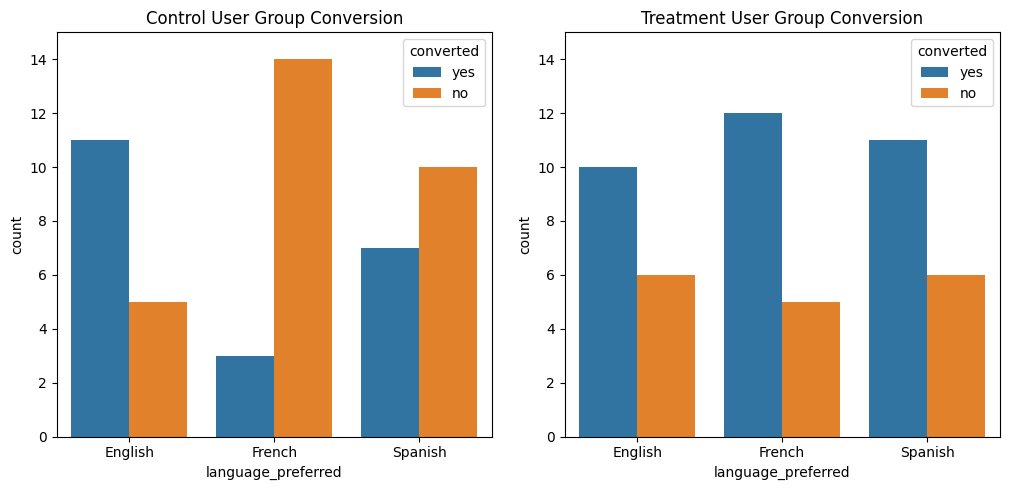

In [ ]:
# Plot users by each group and conversion result
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# set y axis limits to make them the same
y_max = 15
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

# define second plot
plt.subplot(1, 2, 1)
plt.tight_layout()
sns.countplot(data=df_treatment.sort_values(by='language_preferred', ascending=True), x='language_preferred', hue='converted', ax=axes[1])
plt.title('Control User Group Conversion')

# define first plot
plt.subplot(1, 2, 2)
plt.tight_layout()
sns.countplot(data=df_control.sort_values(by='language_preferred', ascending=True), x='language_preferred', hue='converted', ax=axes[0])
plt.title('Treatment User Group Conversion')

plt.show()


In [ ]:
# Show the mean

# Here, we want to add more than one variable, so we need to use a pivot table
pivot_table_language_conversion = pd.pivot_table(df
                                                 , values='isConverted'
                                                 , index='language_preferred'
                                                 , columns='group'
                                                 , aggfunc='sum'
                                                 , fill_value=0)
pivot_table_language_conversion

group,control,treatment
language_preferred,,
English,11,10
French,3,12
Spanish,7,11


**Observations**

*  Converted English users
  *  Old Page: 11
  *  New page: 10
*  Converted French users
  *  Old Page: 3
  *  New page: 12
*  Converted Spanish users
  *  Old Page: 7
  *  New page: 11

*   The mean of non-converted users in the treatment group (new landing page) are much closer than the means of the non-converted users in the control group.

*   English users were the only group to have more conversions than non-conversions on the old landing page.

####Minutes spent on page by User Group

Since one of the initial problems is the design of the landing page and user engagement, time spent on the page is a critical series of data to inspect. It will be the centerpiece of our analysis, as the executives believe there is a correlation between longer times leading to more subscriptions.

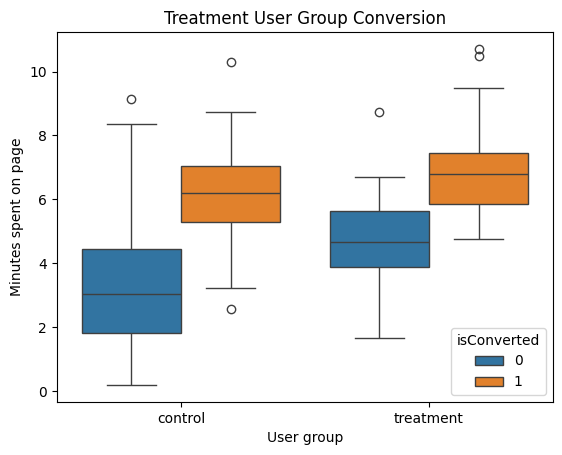

In [ ]:
# Minutes on landing page by group and conversion result
sns.boxplot(df, x=df['group'], y=df['time_spent_on_the_page'], hue=df['isConverted'])
plt.title('Treatment User Group Conversion')
plt.xlabel('User group')
plt.ylabel('Minutes spent on page')
plt.show()

In [ ]:
print('Control group: Mean time spent on page:', df_control['time_spent_on_the_page'].mean())
print('Treatment group: Mean time spent on page:', df_treatment['time_spent_on_the_page'].mean())

print('Converted users in Control group: Mean time spent on page:', df_control[df_control['isConverted'] == 1]['time_spent_on_the_page'].mean())
print('Non-converted users in Control group: Mean time spent on page:', df_control[df_control['isConverted'] == 0]['time_spent_on_the_page'].mean())

print('Converted users in Treatment group: Mean time spent on page:', df_treatment[df_treatment['isConverted'] == 1]['time_spent_on_the_page'].mean())
print('Non-converted users in Treatment group: Mean time spent on page:', df_treatment[df_treatment['isConverted'] == 0]['time_spent_on_the_page'].mean())



Control group: Mean time spent on page: 4.5324
Treatment group: Mean time spent on page: 6.2232
Converted users in Control group: Mean time spent on page: 6.166190476190475
Non-converted users in Control group: Mean time spent on page: 3.349310344827586
Converted users in Treatment group: Mean time spent on page: 6.913939393939394
Non-converted users in Treatment group: Mean time spent on page: 4.882352941176471


**Observations**

*   On average, users spent nearly 2 seconds longer on the new landing page than the old one.
  * Control group: 4.5 minutes
  * Treatment group: 6.2 minutes
*   In both the control and treatment groups, converted users spent more time on the landing page. This supports the excecutive's theory that the longer users spend on the page, the more likely they are to subscribe. We will need to test this hypothesis.
  *  Control group
     * Converted users: 6.2 minutes
     * Non-converted users: 3.3 minutes
  *  Treatment group
     *  Converted users: 6.9
     *  Non-converted users: 4.9 minutes
*   Non-converted users in the treatment group (new landing page) spent more time on the page than non-converted users in the control (old landing page) group.
*    The means for converted users in both groups for minutes spent on the page are close in value.
*   Users in the control (old landing page) group had the widest range of minutes spent on the page. On the new page, u

####Minutes spent on page by User Language Preference

Next, let's see if the time spent on the page varies by language, and how language impacts conversion rate.

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

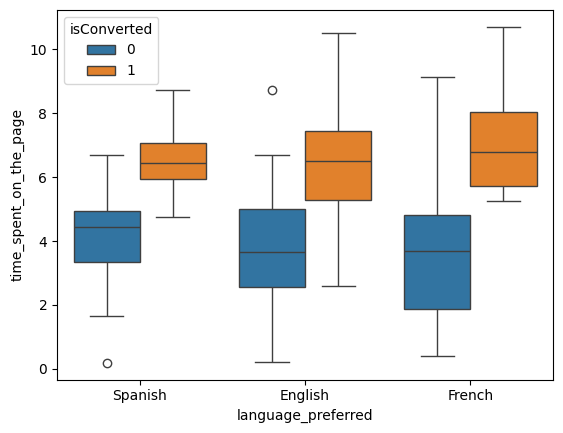

In [ ]:
# Minutes on landing page by user language preference and conversion result
sns.boxplot(df, x=df['language_preferred'], y=df['time_spent_on_the_page'], hue=df['isConverted'])

# OBSERVATION:
#   Regardless of preferred language, about 50% of users spent close to 6 seconds on the landing page.

**Observations**

*  50% of users who visited the new (treatment) page spent a little over 6 minutes on average on the page.
*  50% of users who visited the old (control) page spent a little over 4 minutes on average on the page.
*  A few users on the treatment page had page times that were outliers.
*  All language preferences had a wide range of minutes spent on the page.
*  Converted users for all three language preferences spent about the same time on the page.
*  For uncoverted users, Spanish language preference users spent more time than the other two language preferences.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

We've already done some visual analysis above, but we can use a few other charts to examine the data. We'll also check for a normal distribution in the chart, although we can assume a normal distribution since we know we have exactly 50 samples in each group, per the Central Limit Theorom.

<Axes: xlabel='time_spent_on_the_page', ylabel='group'>

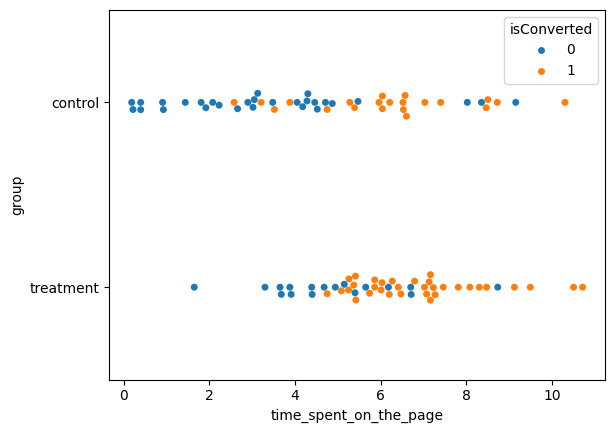

In [ ]:
# Create a swarmplot to view how long users spent on the page, along with whether they converted to subscriptions or not
sns.swarmplot(data=df, x='time_spent_on_the_page', y='group', hue='isConverted')

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

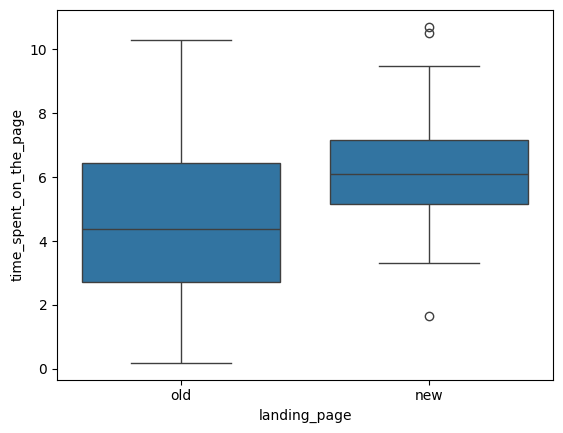

In [ ]:
# Create a boxplot to compare minutes on landing page by page
sns.boxplot(df, x=df['landing_page'], y=df['time_spent_on_the_page'])


<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

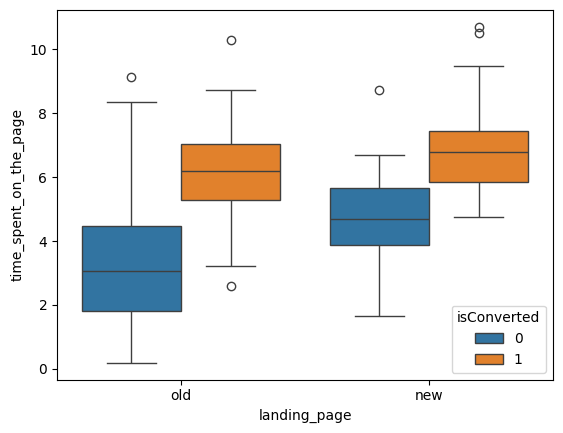

In [ ]:
# Create a boxplot to compare minutes on landing page by page and conversion result
sns.boxplot(df, x=df['landing_page'], y=df['time_spent_on_the_page'], hue=df['isConverted'])


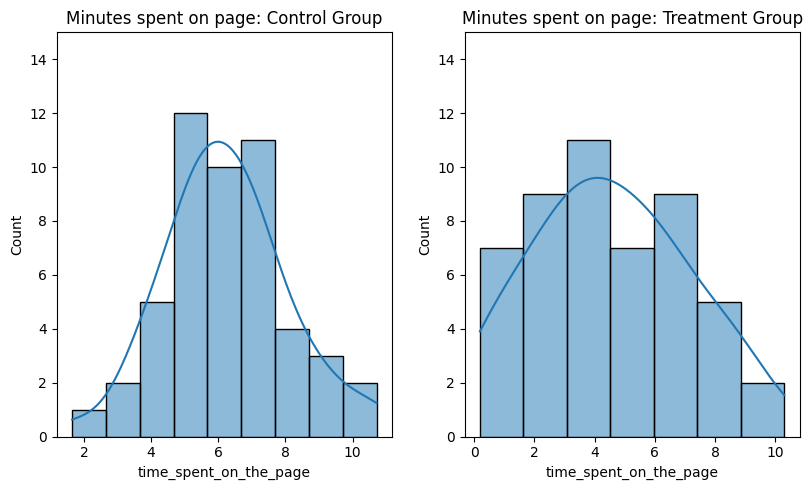

In [ ]:
# Plot the histogram and check normality of the data
# We'll need to do this for both the treatment and control dataframes separately
#     df_treatment
#     df_control

# Plot users by each group and conversion result
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# set y axis limits to make them the same
y_max = 15
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

# define first plot
plt.subplot(1, 2, 1)
plt.tight_layout()
sns.histplot(data=df_control, x='time_spent_on_the_page', kde=True, ax=axes[1])
plt.title('Minutes spent on page: Control Group')

# define second plot
plt.subplot(1, 2, 2)
plt.tight_layout()
sns.histplot(data=df_treatment, x='time_spent_on_the_page', kde=True, ax=axes[0])
plt.title('Minutes spent on page: Treatment Group')
plt.show()


### Step 1: Define the null and alternate hypotheses

**Question to answer: Do users spend more time on the new landing page than the existing landing page?**

Let $\mu_1$ be the mean time users spend on the old landing page and $\mu_2$ the mean time users spend on the new landing page.

Null hypothesis: H<sub>0</sub>:
*There is no difference in the mean time spent on the old landing page and the new landing page.*
>$H_1:\mu_1 = \mu_2$

Alternative Hypothesis: H<sub>A</sub>:
*The mean time spent on the new landing page is greater than the mean time spent on the old landing page.*
>$H_a:\mu_1 > \mu_2$

**Identify the data**

In [ ]:
# Assign values to variables

# Mean time spent on page and standard deviation - all users, all groups
mean_all = round(df['time_spent_on_the_page'].mean(),2)
std_dev_all = round(np.std(df['time_spent_on_the_page']),2)

# Same, but for control group
mean_control = round(df_control['time_spent_on_the_page'].mean(),2)
std_dev_control = round(np.std(df_control['time_spent_on_the_page']),2)

# Same, but for treatment group
mean_treatment = round(df_treatment['time_spent_on_the_page'].mean(),2)
std_dev_treatment = round(np.std(df_treatment['time_spent_on_the_page']),2)

# Show the results
print('Mean: All:',mean_all)
print('Standard Deviation: All:',std_dev_all,'\n')

print('Mean: Control group:', mean_control)
print('Standard Deviation: Control group:', std_dev_control,'\n')

print('Mean: Treatment group:', mean_treatment)
print('Standard Deviation: Treatment group:', std_dev_treatment)


Mean: All: 5.38
Standard Deviation: All: 2.37 

Mean: Control group: 4.53
Standard Deviation: Control group: 2.56 

Mean: Treatment group: 6.22
Standard Deviation: Treatment group: 1.8


**Calculate the Z-score for each group**

Since we are comparing two groups and have all the data for both groups, let's calculate the z-score for the control and treatment groups.

Below, we can determine that the Z-score is higher for the treatment group (new landing page).

In [ ]:
n = 50 #sample size for each group

# Calculate z-score for the control group
z_control = (mean_control - mean_all) / ( std_dev_control/np.sqrt(n))
print('Z-score: Control group', z_control)

# Calculate z-score for the treatment group
z_treatment = (mean_treatment - mean_all) / ( std_dev_treatment/np.sqrt(n))
print('Z-score: Treatment group', z_treatment)


Z-score: Control group -2.3478154844084576
Z-score: Treatment group 3.299831645537221


### Step 2: Select Appropriate test

We know that we want to compare the length of time spent on the page (continuous numerical data) with the landing page type (categorical data).
The question also indicates "greater than", meaning we have a one-tailed test to the right of the histogram vs. left.

**Test for the Z-Test assumptions**
1. Is the data discrete or continuous? (Bivariate: both)
2. Does the data have a normal distribution (Yes, we have over 30 samples)
3. Are the populations dependent or independent? (Independent - no overlap)
4. Do we know the population standard deviation (No, we know it only for our samples, not the entire website population.)
5. Do we have random sampling? (Yes)

We know that we want to measure whether the mean minutes spent on the page (continuous data) is more on the new than the old page.

To compare the two samples, we should use the **Two Independent Sample T-Test  (Unequal/unknown standard deviations)**.

Assumptions
*  2 independent populations (yes, control and treatment)
*  Continuous data (yes, time spent on the page)
*  Normal distribution (yes)
*  Known population standard deviations for both populations (no, just for our samples)
*  Sample size > 30 (yes, each page has 50 samples)


### Step 3: Decide the significance level



We were provided a significance level of 5% (.05).

### Step 4: Collect and prepare data

In [ ]:
df_control.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,isConverted,isNewLandingPage,time_spent_on_the_page_rounded
96,546544,control,old,6.52,yes,English,1,0,6.5
94,546550,control,old,3.05,no,English,0,0,3.0
37,546557,control,old,6.04,yes,English,1,0,6.0
36,546551,control,old,3.13,no,English,0,0,3.0
35,546552,control,old,8.50,yes,English,1,0,8.5


In [ ]:
df_treatment.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,isConverted,isNewLandingPage,time_spent_on_the_page_rounded
1,546468,treatment,new,7.13,yes,English,1,1,7.0
91,546451,treatment,new,8.47,yes,English,1,1,8.5
86,546465,treatment,new,6.71,no,English,0,1,6.5
73,546444,treatment,new,7.46,yes,English,1,1,7.5
72,546452,treatment,new,5.08,yes,English,1,1,5.0


In [ ]:
# What we know
n_all = 100 #sample size for population
n_group = 50 #sample size for each group

# Earlier, we defined the mean and standard deviation for each group as well
#   mean_treatment
#   mean_control
#   std_dev_treatment
#   std_dev_control

# Show the results
print('Mean: All:',mean_all)
print('Standard Deviation: All:',std_dev_all,'\n')

print('Mean: Control group:', mean_control)
print('Standard Deviation: Control group:', std_dev_control,'\n')

print('Mean: Treatment group:', mean_treatment)
print('Standard Deviation: Treatment group:', std_dev_treatment)

Mean: All: 5.38
Standard Deviation: All: 2.37 

Mean: Control group: 4.53
Standard Deviation: Control group: 2.56 

Mean: Treatment group: 6.22
Standard Deviation: Treatment group: 1.8


**Observation**

We can see that the standard deviations are not equal, so we will also assume the population standard deviation is different.

### Step 5: Calculate the p-value

In [ ]:
# Calculate the P-value

#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_treatment['time_spent_on_the_page'], df_control['time_spent_on_the_page'], equal_var = False, alternative='greater')
print('The p-value is ' + str(p_value))

The p-value is 0.00013923812251665402


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Compare p value to level of significance (alpha)
# Draw an inference based on this
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.00013923812251665402 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p-value is less than alpha and therefore statistically significant. Based on this test result, we can reject the null hypothesis.
Users do spend more time on the new landing page than on the old one.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis


Here, we want to revisit the data for both groups of users, with the conversion rate. The boxplots below clearly show that converted users spent longer on the page, but let's create a test to prove this.

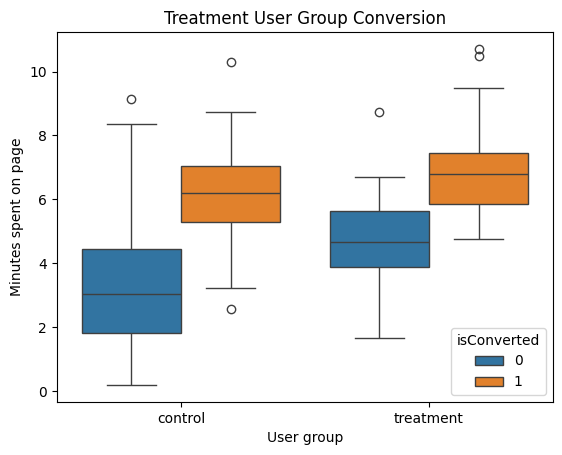

In [ ]:
# Minutes on landing page by group and conversion result
sns.boxplot(df, x=df['group'], y=df['time_spent_on_the_page'], hue=df['isConverted'])
plt.title('Treatment User Group Conversion')
plt.xlabel('User group')
plt.ylabel('Minutes spent on page')
plt.show()

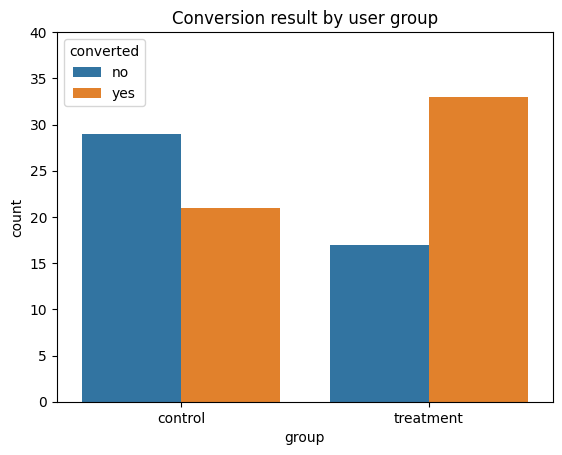

In [ ]:
# Plot users by each group and compare the conversion result
fig = plt.figsize=(8,5)
plt.tight_layout()
plt.ylim(0,40)

ax = sns.countplot(data=df, x='group', hue='converted')

plt.title('Conversion result by user group')
plt.show()

**Observations**

* The conversion rate was higher in the new landing page for Spanish and French, but slightly lower for English.

*Control Group*
* Converted English users: 11
* Non-converted English users: 5
* Conversion Ratio, English: 5/11, or 68.85%


* Converted French users: 3
* Non-converted French users: 14
* Conversion Ratio, French: 3/14, or 17.65%


* Converted Spanish users: 7
* Non-converted Spanish users: 10
* Conversion Ratio, Spanish: 7/10, or 41.18%

*Treatment Group*

* Converted English users: 10
* Non-converted English users: 6
* Conversion Ratio, English: 6/10, or 62.5%
* Converted French users: 12
* Non-converted French users: 5
* Conversion Ratio, French: 5/12, or 70.59%
* Converted Spanish users: 11
* Non-converted Spanish users: 6
* Conversion Ratio, Spanish: 6/11, or 64.71%

### Step 1: Define the null and alternate hypotheses

Null hypothesis: H<sub>0</sub>:
*The number of subscriptions (conversion rate) on the new landing page and old landing page do not differ.*
>$H_1:p_1 = p_2$

Alternative Hypothesis: H<sub>A</sub>:
*The number of subscriptions (conversion rate) is greater on the new landing page then the old landing page.*
>$H_1:p_1 > p_2$

### Step 2: Select Appropriate test


**Test for the  assumptions**
1. Is the data discrete? (discrete)
2. Does the data have a normal distribution (Yes, we have over 30 samples)
3. Are the populations dependent or independent? (Independent - no overlap)
4. Do we know the population standard deviation (No, we know it only for our samples, not the entire website population.)
5. Do we have random sampling? (Yes)

For this question, we want to compare the proportion of users (converted and not converted) in both the control and treatment groups.

To compare the two samples, we should use the **Two Proportion Z Test**.

**Assumptions:**
*  2 independent populations
*  Binomially distributed populations
*  If n * p and n(1 - p) are both >= 10, we can assume normal distribution as an approximate binomial distribution.
Earlier we found 21/50 users were converted in the control group, and 33/50 users in the treatment group.
Since n*p and n(1-p) are both >= 10, we can assume normal distribution as an approximate binomial distribution.


### Step 3: Decide the significance level

We were provided a significance level of 5% (.05).

### Step 4: Collect and prepare data

In [ ]:
df_control['isConverted'].value_counts()

isConverted
0    29
1    21
Name: count, dtype: int64

In [ ]:
df_control['isConverted'].value_counts(normalize=True)

isConverted
0    0.58
1    0.42
Name: proportion, dtype: float64

In [ ]:
control_converted = df_control['isConverted'].sum()
control_not_converted = df_control.shape[0] - control_converted
print('Control group:', control_converted, 'users were converted, while', control_not_converted, 'were not.')

Control group: 21 users were converted, while 29 were not.


In [ ]:
df_treatment['isConverted'].value_counts()

isConverted
1    33
0    17
Name: count, dtype: int64

In [ ]:
df_treatment['isConverted'].value_counts(normalize=True)

isConverted
1    0.66
0    0.34
Name: proportion, dtype: float64

In [ ]:
treatment_converted = df_treatment['isConverted'].sum()
treatment_not_converted = df_treatment.shape[0] - control_converted
print('Treatment group:', treatment_converted, 'users were converted, while', treatment_not_converted, 'were not')

Treatment group: 33 users were converted, while 29 were not


In [ ]:
pivot_df = pd.pivot_table(df
                                         ,values='isConverted'    # the values to count
                                         ,index='group'           # the grouping to use
                                         ,aggfunc='sum'         # the type of aggregation to use
                                         ,margins=False            # adds a new row to store total, with next line
)
pivot_df

,isConverted
group,
control,21
treatment,33


### Step 5: Calculate the p-value


In [ ]:
# Import the function for two-proportion Z test
from statsmodels.stats.proportion import proportions_ztest

# Define the data for conversions
old_conversions = 21  # Number of conversions
new_conversions = 33  # Number of conversions

# Define the number of observations
old_visitors = 50    # Total number of visitors
new_visitors = 50    # Total number of visitors

# Perform the z-test for proportions
z_statistic, p_value = proportions_ztest([new_conversions, old_conversions], [new_visitors, old_visitors], alternative='larger')

print("z-statistic:", z_statistic)
print("p-value:", p_value)

z-statistic: 2.4077170617153842
p-value: 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Compare p value to level of significance (alpha)
# Draw an inference based on this
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p-value of .008 is less than alpha, so the result is statistically significant. We can reject the null hypothesis.
The conversion rate is higher for the new landing page.

## 3. Are the conversion and preferred language independent or related?

To answer this question, we need to understand if the conversion rate is related to language or not, in addition to whether or not users are on the new or old landing page.

Because we have two different variables to consider, this analysis will be a little more complex.

### Perform Visual Analysis

In [ ]:
# Create another crosstab for conversion by language preference, but only for the new landing page
crosstab_treatment_language = pd.crosstab(df_treatment.isConverted, df.language_preferred, margins=False, normalize=False)
crosstab_treatment_language

language_preferred,English,French,Spanish
isConverted,,,
0,6,5,6
1,10,12,11


To look at the conversion rate by language, we can plot a histogram and box plot.

In [ ]:
# Plot the histogram and check normality of the data
# We'll need to do this for each language separately, so let's create unique dataframes for each preference
df_english = df[df['language_preferred'] == 'English']
df_french  = df[df['language_preferred'] == 'French']
df_spanish = df[df['language_preferred'] == 'Spanish']

In [ ]:
# Get the counts per language preference
df.value_counts('language_preferred')

language_preferred
French     34
Spanish    34
English    32
Name: count, dtype: int64

In [ ]:
# Create an array for the languages, and variables for the counts
languages = df['language_preferred'].unique()
languages

array(['Spanish', 'English', 'French'], dtype=object)

In [ ]:
# Create dataframes for converted and unconverted users in each group

english_converted = df_english[df_english['isConverted'] == 1]
english_not_converted = df_english[df_english['isConverted'] == 0]
french_converted = df_french[df_french['isConverted'] == 1]
french_not_converted = df_french[df_french['isConverted'] == 0]
spanish_converted = df_spanish[df_spanish['isConverted'] == 1]
spanish_not_converted = df_spanish[df_spanish['isConverted'] == 0]


print('Converted users: English', english_converted.shape[0])
print('Non-converted users: English', english_not_converted.shape[0])
print('Converted users: French', french_converted.shape[0])
print('Non-converted users: French', french_not_converted.shape[0])
print('Converted users: Spanish', spanish_converted.shape[0])
print('Non-converted users: Spanish', spanish_not_converted.shape[0])


Converted users: English 21
Non-converted users: English 11
Converted users: French 15
Non-converted users: French 19
Converted users: Spanish 18
Non-converted users: Spanish 16


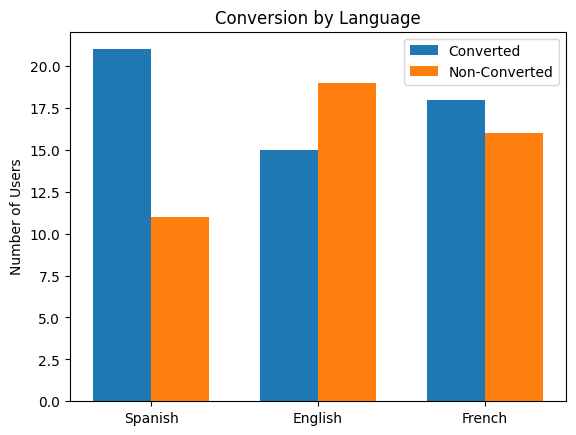

In [ ]:
# Create a chart with the counts for each

# Number of converted users for each language
converted = [english_converted.shape[0], french_converted.shape[0], spanish_converted.shape[0]]
# Number of non-converted users for each language
not_converted = [english_not_converted.shape[0], french_not_converted.shape[0], spanish_not_converted.shape[0]]

x = np.arange(len(languages))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, converted, width, label='Converted')
bars2 = ax.bar(x + width/2, not_converted, width, label='Non-Converted')

ax.set_ylabel('Number of Users')
ax.set_title('Conversion by Language')
ax.set_xticks(x)
ax.set_xticklabels(languages)
ax.legend()

plt.show()


### Step 1: Define the null and alternate hypotheses


Null hypothesis

>$H_0:$ Conversion rate is independent of language preference.

>$H_a:$ Conversion rate is dependent on language preference.


### Step 2: Select Appropriate test

Here, we have three distinct populations (categorical/discrete) and two variables we want to inspect (conversion rate and preferred language).

Because of this, we will want to use the Chi square test for independence.

### Step 3: Decide the significance level

We were provided a significance level of 5% (.05).

### Step 4: Collect and prepare data

In [ ]:
# Create a contingency crosstab for conversion by language preference
chi_cont_table = pd.crosstab(df.converted, df.language_preferred, margins=False, normalize=False)

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(chi_cont_table)
print('The p-value is ', p_value)

The p-value is  0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Compare p value to level of significance (alpha)
# Draw an inference based on this
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value of .21 is greater than alpha, so we fail to reject the null hypothesis.
Conversion rate is not dependent on language preference.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# Plot users by each language preference and time spent on page

# Earlier we set up dataframes for each group, and now we also need an array for language
languages = df_control['language_preferred'].unique()

df_control_english = df_control[df_control['language_preferred'] == 'English']
df_control_french = df_control[df_control['language_preferred'] == 'French']
df_control_spanish = df_control[df_control['language_preferred'] == 'Spanish']

df_treatment_english = df_treatment[df_treatment['language_preferred'] == 'English']
df_treatment_french = df_treatment[df_treatment['language_preferred'] == 'French']
df_treatment_spanish = df_treatment[df_treatment['language_preferred'] == 'Spanish']

print('Count of Users: All',  df_treatment.shape[0])
print('Count of English Users:',  df_treatment_english.shape[0])
print('Count of French Users:',  df_treatment_french.shape[0])
print('Count of Spanish Users:',  df_treatment_spanish.shape[0])


Count of Users: All 50
Count of English Users: 16
Count of French Users: 17
Count of Spanish Users: 17


In [ ]:
mean_df_treatment_english = df_treatment_english['time_spent_on_the_page'].mean()
mean_df_treatment_french = df_treatment_french['time_spent_on_the_page'].mean()
mean_df_treatment_spanish = df_treatment_spanish['time_spent_on_the_page'].mean()

print('Mean: English Treatment group',  mean_df_treatment_english)
print('Mean: French Treatment group:',  mean_df_treatment_french)
print('Mean: Spanish Treatment group',  mean_df_treatment_spanish)


Mean: English Treatment group 6.66375
Mean: French Treatment group: 6.196470588235293
Mean: Spanish Treatment group 5.835294117647059


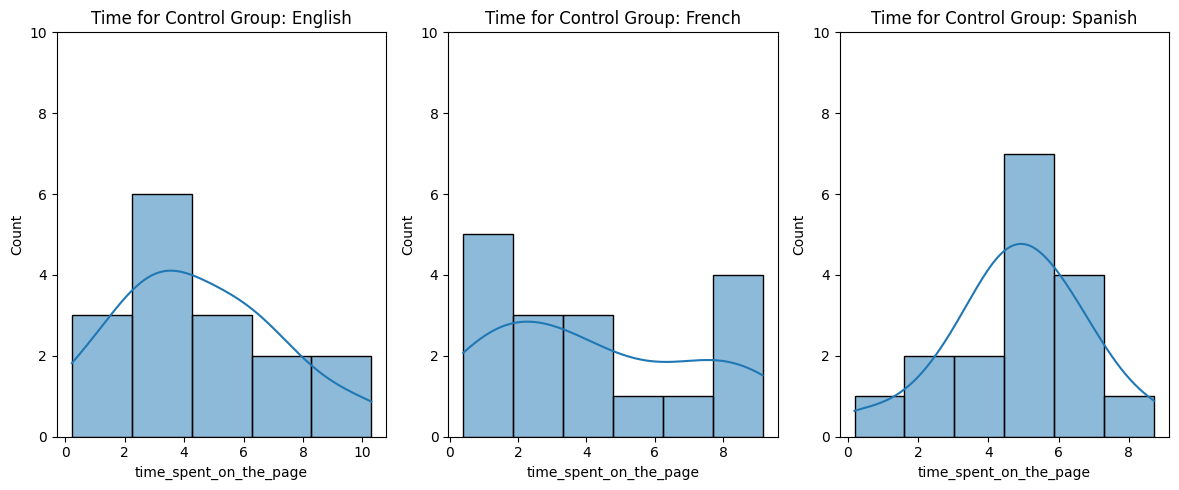

Text(0.5, 1.0, 'Time for Treatment Group: Spanish')

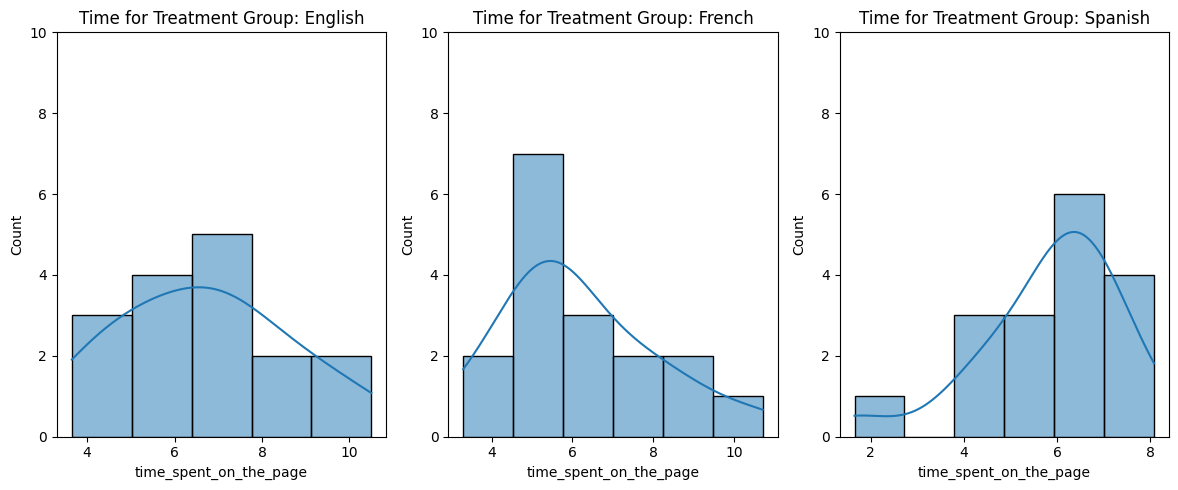

In [ ]:
# First, the control group
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# set y axis limits to make them the same
y_max = 10
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)
axes[2].set_ylim(0, y_max)

# define control, english
plt.subplot(1, 3, 1)
plt.tight_layout()
sns.histplot(data=df_control,x=df_control_english['time_spent_on_the_page'], legend=False, kde=True);
plt.title('Time for Control Group: English')

# define control, french
plt.subplot(1, 3, 2)
plt.tight_layout()
sns.histplot(data=df_control,x=df_control_french['time_spent_on_the_page'], legend=False, kde=True);
plt.title('Time for Control Group: French')

# define control, spanish
plt.subplot(1, 3, 3)
plt.tight_layout()
sns.histplot(data=df_control,x=df_control_spanish['time_spent_on_the_page'], legend=False, kde=True);
plt.title('Time for Control Group: Spanish')

plt.show()

# Now, the treatment group
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# set y axis limits to make them the same
y_max = 10
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)
axes[2].set_ylim(0, y_max)

# define treatment, english
plt.subplot(1, 3, 1)
plt.tight_layout()
sns.histplot(data=df_treatment,x=df_treatment_english['time_spent_on_the_page'], legend=False, kde=True);
plt.title('Time for Treatment Group: English')

# define control, french
plt.subplot(1, 3, 2)
plt.tight_layout()
sns.histplot(data=df_treatment,x=df_treatment_french['time_spent_on_the_page'], legend=False, kde=True);
plt.title('Time for Treatment Group: French')

# define control, spanish
plt.subplot(1, 3, 3)
plt.tight_layout()
sns.histplot(data=df_treatment,x=df_treatment_spanish['time_spent_on_the_page'], legend=False, kde=True);
plt.title('Time for Treatment Group: Spanish')

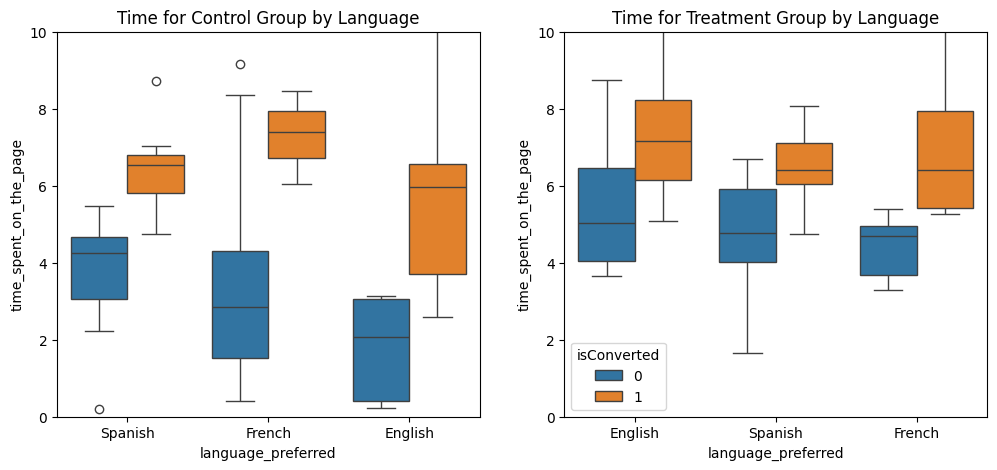

In [ ]:
# Let's repeat the diagram from our bivariate analysis earlier, but by group
# Minutes on landing page by user language preference and conversion result and group

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# set y axis limits to make them the same
y_max = 10
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

# define treatment, english
plt.subplot(1, 2, 1)
sns.boxplot(df, x=df_control['language_preferred'], y=df_control['time_spent_on_the_page'], hue=df['isConverted'], legend=False)
plt.title('Time for Control Group by Language')

# define control, french
plt.subplot(1, 2, 2)
sns.boxplot(df, x=df_treatment['language_preferred'], y=df_treatment['time_spent_on_the_page'], hue=df['isConverted'])
plt.title('Time for Treatment Group by Language')

plt.show()

OBSERVATIONS:

*   The mean time spent on the page by language was about the same for all three languages on the new landing page.
*   On the old landing page, the mean time varied more per language.

### Step 1: Define the null and alternate hypotheses


Question to answer: Do users spent the same amount of time on the new landing page, regardless of language preference?

Let $\mu_1, \mu_2$ be the mean time spent on page for the treatment group by language.

Null hypothesis: H<sub>0</sub>:
*Users spend the same amount of time on the new landing page for all languages.*
$$H_0: \mu = \mu_2 = \mu_4 = \mu_n$$

Alternative Hypothesis: H<sub>A</sub>:
*Users do not spend the same amount of time on the new landing page for all languages.*
$$H_1: \text{At least one of } \mu_n \text{ is different}$$

### Step 2: Select Appropriate test

Since we have one discrete variable (language preference for three different groups, with all groups in the same parent Treatment group) and a continuous variable (time spent on the page), we must use the ANOVA test.

And, since we are testing for only one factor (language) with three levels (values of the preferred language), it's the One-Way ANOVA Test.

Assumptions:
*   Discrete (language) and Continuous(time on page) data (yes)
*   Normally distributed populations (we have fewer than 30 users in each group, but the entire group has 50, so yes)
* Random sampling (yes)
* Independent observations (yes; the groups have no overlap)

We can use the Shapiro-Wilk's test to validate the assumption that the time on the new page by language follows a normal distribution.


In [ ]:
# Run Shapiro-Wilk's test
from scipy.stats import shapiro

# Run for English sample
test_stat, p_value = stats.shapiro(df_control_english['time_spent_on_the_page'])
print('English control group: test_stat:', test_stat)
print('English  control group: p_value:', p_value)

# Run for French sample
test_stat, p_value = stats.shapiro(df_control_french['time_spent_on_the_page'])
print('French control group: test_stat:', test_stat)
print('French  control group: p_value:', p_value)

# Run for Spanish sample
test_stat, p_value = stats.shapiro(df_control_spanish['time_spent_on_the_page'])
print('Spanish control group: test_stat:', test_stat)
print('Spanish control group: p_value:', p_value)

English control group: test_stat: 0.9622389674186707
English  control group: p_value: 0.7025561332702637
French control group: test_stat: 0.9021406173706055
French  control group: p_value: 0.07376813143491745
Spanish control group: test_stat: 0.9764426350593567
Spanish control group: p_value: 0.9179720878601074


The resulting p-values of the test tells us that there is not enough evidence  to reject the null hypothesis that the response follows the normal distribution. We can proceed with the One-Way ANOVA F-Test.

### Step 3: Decide the significance level

We were provided a significance level of 5% (.05).

### Step 4: Collect and prepare data

In [ ]:
# Create an array of languages
languages = df_treatment['language_preferred']

In [ ]:
# Calculate means for each language
mean_treatment_english = df_treatment_english['time_spent_on_the_page'].mean()
mean_treatment_french = df_treatment_french['time_spent_on_the_page'].mean()
mean_treatment_spanish = df_treatment_spanish['time_spent_on_the_page'].mean()

print('Treatment Group:\n')
print('Mean: English:', mean_treatment_english)
print('Mean: French:', mean_treatment_french)
print('Mean: Spanish:', mean_treatment_spanish,'\n')

# Calculate standard deviation for each language
std_dev_treatment_english = round(np.std(df_treatment_english['time_spent_on_the_page']),2)
std_dev_treatment_french = round(np.std(df_treatment_french['time_spent_on_the_page']),2)
std_dev_treatment_spanish = round(np.std(df_treatment_spanish['time_spent_on_the_page']),2)

print('Standard Deviation: English:',std_dev_treatment_english)
print('Standard Deviation: French:',std_dev_treatment_french)
print('Standard Deviation: Spanish:',std_dev_treatment_spanish)

Treatment Group:

Mean: English: 6.66375
Mean: French: 6.196470588235293
Mean: Spanish: 5.835294117647059 

Standard Deviation: English: 1.92
Standard Deviation: French: 1.88
Standard Deviation: Spanish: 1.48


In [ ]:
# We may need to know the mean and standard deviation for the entire treatment group
print('Treatment Group: Mean:', df_treatment['time_spent_on_the_page'].mean())
print('Treatment Group: Standard Deviation:', round(np.std(df_treatment['time_spent_on_the_page']),2))

Treatment Group: Mean: 6.2232
Treatment Group: Standard Deviation: 1.8


### Step 5: Calculate the p-value

Next, we will run the F-test to obtain the p-value, using each of the three subgroups (one per language preference).

In [ ]:
# Run the f_test for equality of variances
test_stat, p_value = stats.f_oneway(df_treatment_english['time_spent_on_the_page'], df_treatment_french['time_spent_on_the_page'], df_treatment_spanish['time_spent_on_the_page'], axis=0)
print('Test statistic:', test_stat)
print('P-value:', p_value)


Test statistic: 0.8543992770006821
P-value: 0.43204138694325955


We can also use Tukey’s Honest Significant Difference (HSD) test to see if one group's variance is different. In this hypothesis test, the pairwise comparision tells us this isn't the case.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

group_compare = pairwise_tukeyhsd(endog=df_treatment['time_spent_on_the_page'], groups=df_treatment['language_preferred'], alpha=0.05)
print(group_compare)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7434 -2.0035  1.069  False
English Spanish  -0.8285 0.3995 -2.3647 0.7078  False
 French Spanish  -0.3612 0.8326  -1.874 1.1516  False
-----------------------------------------------------


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Compare p value to level of significance (alpha)
# Draw an inference based on this
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value of .43 is greater than alpha, so we fail to reject the null hypothesis. Users spend about the same amount of time on the new page, regardless of language preference.


## Conclusion and Business Recommendations

During this analysis, we examined data related to the control (old landing page) and treatment (new landing page) user groups. We posed and answered four different questions. Next, we will discuss our findings and make recommendations.

###Question Summary

**Question 1:**

Do the users spend more time on the new landing page than on the existing landing page?

* The Control group spent an average of 4.53 minutes on the old landing page.
* Meanwhile, the Treatment group spent an average of 6.22 minutes on the new landing page - an increase of 1.69 minutes.

*Answer: Yes, users spend more time on the new landing page than the old one.*

**Question 2:**

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

* In the old landing page, 58% of the users were converted (signed up for a subscription).

* In the new landing page, 66% of users were converted - an increase of 8%.

*Answer: Yes, the conversion rate is higher on the new landing page, as evidenced by the treatment group.*



**Question 3:**

Does the converted status depend on the preferred language?

For the old landing page, the conversion rate was lower:
*  6 English users
*  5 French users
*  6 Spanish users

On the new landing page, the numbers increased for all three language users:
*  10 English users (62%)
*  12 French users (71%)
*  11 Spanish users (65%)

*Answer: No, conversion rate is not dependent on language preference. Although all three languages exhibited higher conversion rates on the new landing page, the conversion results were not statistically significant between the languages.*


**Question 4:**

Is the time spent on the new page the same for the different language users?

The users in the treatment group spent about the same amount of time on the page. The average time was within a minute for all three languages.
*  Mean: English Treatment group 6.66 minutes
*  Mean: French Treatment group: 6.65 minutes
*  Mean: Spanish Treatment group 5.84 minutes

Note: If we were to compare the times by both language and control group, we would find that users in all three languages spent significantly more time on the new landing page vs. the old one. However, the question is asking specifically only about the new landing page.

*Answer: Yes, users in all three languages spent approximately the same amount of time on the new landing page (less than a minute difference in the means). Although Spanish users spent slightly less time, the variance was not statistically significant*.

###Predicting Future Conversions

Earlier, we found the conversion ratios, and also observed that the conversion rate was higher in the new landing page for Spanish and French, but slightly lower for English users.

*Control Group*
* Conversion Ratio, English: 5/11, or 68.85%
* Conversion Ratio, French: 3/14, or 17.65%
* Conversion Ratio, Spanish: 7/10, or 41.18%

*Treatment Group*

* Conversion Ratio, English: 6/10, or 62.5%
* Conversion Ratio, French: 5/12, or 70.59%
* Conversion Ratio, Spanish: 6/11, or 64.71%

Let's see if we can make any predictions about future users based on this analysis. To do this, we'll use a binomial distribution.

**P(X = x)**

*  P = probability
*  X = random variable
*  x = specific value

Since we already know the new landing page is an improvement, we will do this only for the treatment group, by language.

* n=50
* x = number of users converted in the each language group
* p = conversion rate of the new group (number of converted users in the new group / total users in the new group)

Assumptions:
* Each trial has two outcomes (yes - converted or not)
* Trials are independent (yes - no overlap)
* Probablity is constant for each trial (yes, users will convert or not)
* Sample size is fixed (yes)

Even though we have fewer than 30 users in each group, the assumptions are satisifed.

In [ ]:
# Count the converted users in treatment group using our data from earlier.
print('# Converted English users, Treatment group:', converted_treatment_english_user_count.shape[0])
print('# Non-converted English users, Treatment group:', treatment_english_user_count.shape[0] - converted_treatment_english_user_count.shape[0])
conversion_rate_english = converted_treatment_english_user_count.shape[0] / treatment_english_user_count.shape[0]
print('Ratio, English:', np.round(conversion_rate_english,2),'\n')

print('# Converted French users, Treatment group:', converted_treatment_french_user_count.shape[0])
print('# Non-converted French users, Treatment group:', treatment_french_user_count.shape[0] - converted_treatment_french_user_count.shape[0])
conversion_rate_french = converted_treatment_french_user_count.shape[0] / treatment_french_user_count.shape[0]
print('Ratio, French:', np.round(conversion_rate_french,2),'\n')

print('# Converted Spanish users, Treatment group:', converted_treatment_spanish_user_count.shape[0])
print('# Non-converted Spanish users, Treatment group:', treatment_spanish_user_count.shape[0] - converted_treatment_spanish_user_count.shape[0])
conversion_rate_spanish = converted_treatment_spanish_user_count.shape[0] / treatment_spanish_user_count.shape[0]
print('Ratio, Spanish:', np.round(conversion_rate_spanish,2),'\n')



# Converted English users, Treatment group: 10
# Non-converted English users, Treatment group: 6
Ratio, English: 0.62 

# Converted French users, Treatment group: 12
# Non-converted French users, Treatment group: 5
Ratio, French: 0.71 

# Converted Spanish users, Treatment group: 11
# Non-converted Spanish users, Treatment group: 6
Ratio, Spanish: 0.65 



In [ ]:
# Calculate Probability mass function for each Treatment group by language
# Binomial PMF: binom.pmf(# converted users, # users in language group, conversion rate)

print('According to PMF:')

# English: 10 converted users, 16 in group, 10/16
pmf_english = binom.pmf(converted_treatment_english_user_count.shape[0], treatment_english_user_count.shape[0], conversion_rate_english)
print('   English users have a', np.round(pmf_english*100,2),'% chance of being converted on the new landing page.')

# French: 12 converted users, 17 in group, 12/17
pmf_french = binom.pmf(converted_treatment_french_user_count.shape[0], treatment_french_user_count.shape[0], conversion_rate_french)
print('   French users have a', np.round(pmf_french*100,2),'%  of being converted on the new landing page.')

# Spanish: 11 converted users, 17 in group, 10/16
pmf_spanish = binom.pmf(converted_treatment_spanish_user_count.shape[0], treatment_spanish_user_count.shape[0], conversion_rate_spanish)
print('   Spanish users have a', np.round(pmf_spanish*100,2),'% chance of being converted on the new landing page.')

According to PMF:
   English users have a 20.25 % chance of being converted on the new landing page.
   French users have a 20.84 %  of being converted on the new landing page.
   Spanish users have a 19.91 % chance of being converted on the new landing page.


We would have expected to see a higher percentage for this based on the ratio for each language exceeding over half the users in the group.

With small sample sizes, the PMF approach can be less accurate. We recommend taking further user samples by language and re-running this.

###Recommendations


Ongoing Monitoring
*  This analysis used a limited dataset. Solutions are widely available for tracking every users's visit. Having real-time insights into users' site interactions could make it easier to respond to observed user trends more immediately.

Landing Page
*  **Based on this analysis, the new landing page appears positioned for success. We recommend that it be launched for all users.** Users are clearly more engaged in this version, and the change should result in increased conversions, and therefore, revenue.
*    Both the control and treatment groups exhibited outliers. Some users spent far more minutes on the page than other users. The company could consider launching a survey that appears when a user leaves the page, prompting them for additional feedback.

Language
*  Only three languages are offered currently. Readership and conversions could be expanded by offering support for additional languages.
*  More sampling should be done with English users to find out why the conversion rate is lower on the new landing page.
*  Based on PMF analysis, all three language users have about the same chance of being converted on the new landing page. However, the small sample size is likely muting this effect, and we recommend further sampling based on language to re-running prediction models.
  *  English users: 20.25%
  *  French users: 20.84%
  *  Spanish users: 19.91%

* For all three languages, time spent on the page was significantly higher on the new landing page than the old one. In addition, the conversion rates do vary by language.
   *   French language users had the least conversions on the old landing page, but the most conversions on the new landing page.
   *   English language users had the most conversions on the old page vs. the new one, unlike the other two languages.
* Since the reader's language preference is observable, another way to increase readership and subscriptions could be to develop algorithms to promote articles in specific regions where the user's language is common. For example, articles about events in Mexico or Brazil may appeal more widely to Spanish-speaking users, while articles about French events could garner more clicks by French users.

## Create HTML version of project

Finally, make an HTML file.


In [ ]:
# Create an HTML version of this notebook - do this last
  %%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/2-Intro to Statistics/Project 2/ENews_Express_Learner_Notebook_Full_Code - Tuesday Frase.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/2-Intro to Statistics/Project 2/ENews_Express_Learner_Notebook_Full_Code - Tuesday Frase.ipynb to html
[NbConvertApp] Writing 1529370 bytes to /content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/2-Intro to Statistics/Project 2/ENews_Express_Learner_Notebook_Full_Code - Tuesday Frase.html


___